In [5]:
# in this file we will implement data augmentation techniques for the dataset
# open the folder "augmented_intensity_test_images"

import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# define the path to the folder containing the images
path = "augmented_intensity_test_images"
# get the list of images in the folder
images = os.listdir(path)

print("Number of images in the folder: ", len(images))

Number of images in the folder:  104


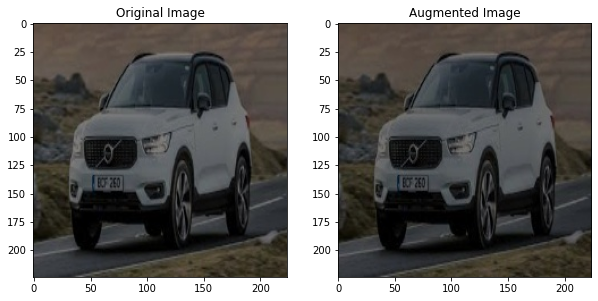

In [6]:
#3 mulitply the image by a random value
# loop through the images
for image in images:
    # read the image
    img = cv2.imread(os.path.join
                        (path, image))
    # get a random value between 0.5 and 1.5
    random_value = random.uniform(0.5, 1.0)
    # multiply the image by the random value
    img = img * random_value
    # save the augmented image
    cv2.imwrite(os.path.join(path, "multiply_augmented_" + image), img)
    
# print the real and augmented images side by side
# read the original image
original_img = cv2.imread(os.path.join(path, images[2]))
# read the augmented image
augmented_img = cv2.imread(os.path.join(path, "multiply_augmented_" + images[2]))
# plot the images side by side
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title("Augmented Image")
plt.imshow(cv2.cvtColor(augmented_img, cv2.COLOR_BGR2RGB))
plt.show()

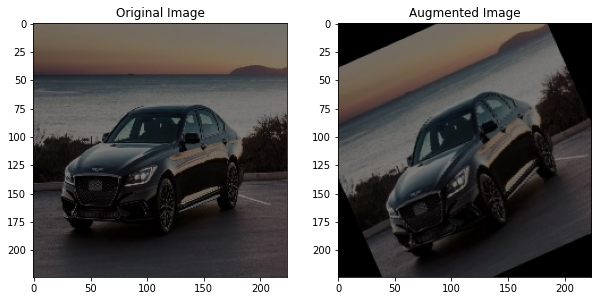

In [7]:
# 6: slight rotation
# loop through the images
for image in images:
    # read the image
    img = cv2.imread(os.path.join
                        (path, image))
    # get the height and width of the image
    height, width = img.shape[:2]
    # get a random value between -30 and 30
    random_value = random.randint(-30, 30)
    # get the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), random_value, 1)
    # rotate the image
    img = cv2.warpAffine(img, rotation_matrix, (width, height))
    # save the augmented image
    cv2.imwrite(os.path.join(path, "rotation_augmented_" + image), img)
    
# print the real and augmented images side by side
# read the original image
original_img = cv2.imread(os.path.join(path, images[5]))
# read the augmented image
augmented_img = cv2.imread(os.path.join(path, "rotation_augmented_" + images[5]))
# plot the images side by side
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title("Augmented Image")
plt.imshow(cv2.cvtColor(augmented_img, cv2.COLOR_BGR2RGB))
plt.show()


In [8]:
path = "augmented_intensity_test_images"
# get the list of images in the folder
images = os.listdir(path)

print("Number of images in the folder: ", len(images))

Number of images in the folder:  248


In [10]:
# now read the images from the Not_Car folder and apply the same augmentation techniques
# define the path to the folder containing the images
path2 = "Not_car"
# get the list of images in the folder
images2 = os.listdir(path2)
#print("Number of images in the folder: ", len(images2))

# loop through the images
for image in images2:
    # read the image
    img = cv2.imread(os.path.join
                        (path2, image))
    # apply the augmentation techniques
    # 1. change the intensity of the image by adding a random value to each pixel
    # get a random value between -50 and 50
    random_value = random.randint(-50, 50)
    # add the random value to the image
    img = img + random_value
    # save the augmented image
    cv2.imwrite(os.path.join(path2, "AugmentedNotCar"+ image), img)
    
print(len(images2))

30


In [11]:
# now we will add labels to the images
# create a file to store the labels, all images from Not_Car folder will have label 0
# all images from the augmented_intensity_test_images folder will have label 1
# we will use these lists to build a classifier later on 

# create a list to store the labels
labels = []
# loop through the images in the Not_Car folder
for image in images2:
    labels.append(0)
# loop through the images in the augmented_intensity_test_images folder
for image in images:
    labels.append(1)

# now save the labels to a file
# open the file
file = open("labels.txt", "w")
# write the labels to the file
for label in labels:
    file.write(str(label) + "\n")
# close the file
file.close() 

In [12]:
# now we will create a file to store the paths to the images
# open the file
file = open("paths.txt", "w")
# write the paths to the file
for image in images2:
    file.write(os.path.join(path2, image) + "\n")
for image in images:
    file.write(os.path.join(path, image) + "\n")
# close the file
file.close()

In [13]:
# create a csv file to store the paths and labels
import csv
# create a dataframe to store the paths and labels
# take the labels from the labels.txt file and add them in a dataframe with column name  "label"

# read the labels from the file
file = open("labels.txt", "r")
# read the labels
labels = file.readlines()
# close the file
file.close()

# remove the "\n" from the labels
for i in range(len(labels)):
    labels[i] = labels[i].replace("\n", "")

# create a dictionary to store the data
data = {"label": labels}

# DO the same with the paths
# read the paths from the file
file = open("paths.txt", "r")
# read the paths
paths = file.readlines()
# close the file
file.close()

# remove the "\n" from the paths
for i in range(len(paths)):
    paths[i] = paths[i].replace("\n", "")

# add the paths to the dataframe
data = {"label": labels, "path": paths}

# create a dataframe

import pandas as pd
df = pd.DataFrame(data)
# save the dataframe to a csv file
df.to_csv("data.csv", index=False)
# read the csv file
data = pd.read_csv("data.csv")
data
data

,label,path
0,0,Not_car\AugmentedNotCarAugmentedNotCarAugmente...
1,0,Not_car\AugmentedNotCarAugmentedNotCarAugmente...
2,0,Not_car\AugmentedNotCarAugmentedNotCarAugmente...
3,0,Not_car\AugmentedNotCarAugmentedNotCarAugmente...
4,0,Not_car\AugmentedNotCarAugmentedNotCarAugmente...
...,...,...
273,1,augmented_intensity_test_images\rotation_augme...
274,1,augmented_intensity_test_images\rotation_augme...
275,1,augmented_intensity_test_images\rotation_augme...
276,1,augmented_intensity_test_images\rotation_augme...


In [14]:
# import the libraries for image classifier 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [15]:
# read the data from the csv file
data = pd.read_csv("data.csv")
# shuffle the data
data = shuffle(data)
# split the data into training and testing
train, test = train_test_split(data, test_size=0.2, random_state=42)

# create the image data generator
train_data_generator = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)
test_data_generator = ImageDataGenerator(rescale=1./255)

# create the training and testing data
train_data = train_data_generator.flow_from_dataframe(train, x_col="path", y_col="label", target_size=(227, 227), class_mode="raw")
test_data = test_data_generator.flow_from_dataframe(test, x_col="path", y_col="label", target_size=(227, 227), class_mode="raw")


Found 222 validated image filenames.
Found 56 validated image filenames.


In [16]:
# now we will apply the VGG 16 model
# create the model
model = Sequential()
# create a vgg architeture 
model.add(Conv2D(64, (3, 3), input_shape=(227, 227, 3), activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

# print the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 223, 223, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

In [19]:
# create a small batch size for the training
batch_size = 32
# compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
# fit the model
history = model.fit(train_data, validation_data=test_data, epochs=10, batch_size=batch_size)

Epoch 1/10
7/7 [==============================] - 157s 21s/step - loss: 5.6374 - accuracy: 0.8919 - val_loss: 0.3483 - val_accuracy: 0.8929
Epoch 2/10
7/7 [==============================] - 136s 20s/step - loss: 0.3870 - accuracy: 0.8919 - val_loss: 0.3962 - val_accuracy: 0.8929
Epoch 3/10
7/7 [==============================] - 151s 22s/step - loss: 0.3898 - accuracy: 0.8919 - val_loss: 0.3613 - val_accuracy: 0.8929
Epoch 4/10
7/7 [==============================] - 143s 21s/step - loss: 0.3476 - accuracy: 0.8919 - val_loss: 0.2971 - val_accuracy: 0.8929
Epoch 5/10
7/7 [==============================] - 132s 19s/step - loss: 0.2929 - accuracy: 0.8919 - val_loss: 0.2514 - val_accuracy: 0.8929
Epoch 6/10
7/7 [==============================] - 134s 19s/step - loss: 0.2636 - accuracy: 0.8919 - val_loss: 0.2247 - val_accuracy: 0.8929
Epoch 7/10
7/7 [==============================] - 133s 19s/step - loss: 0.2248 - accuracy: 0.9099 - val_loss: 0.2409 - val_accuracy: 0.9286
Epoch 8/10
7/7 [====

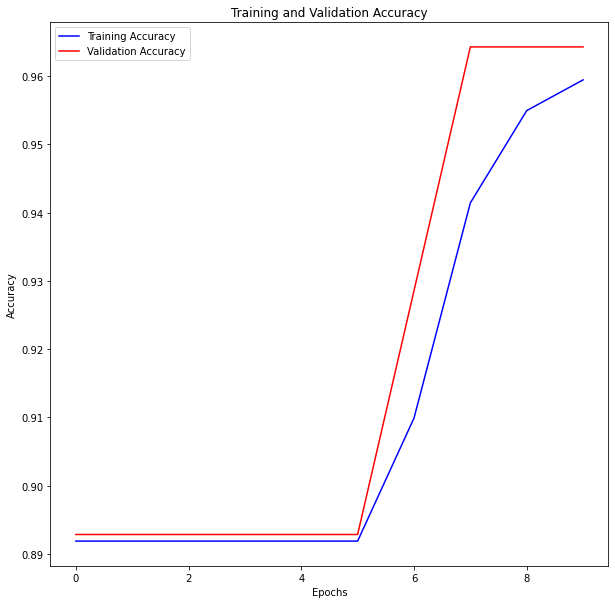

In [20]:
#Evaluate the model
# plot the training and validation accuracy
plt.figure(figsize=(10, 10))
plt.plot(history.history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color="red")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

2/2 [==============================] - 9s 3s/step


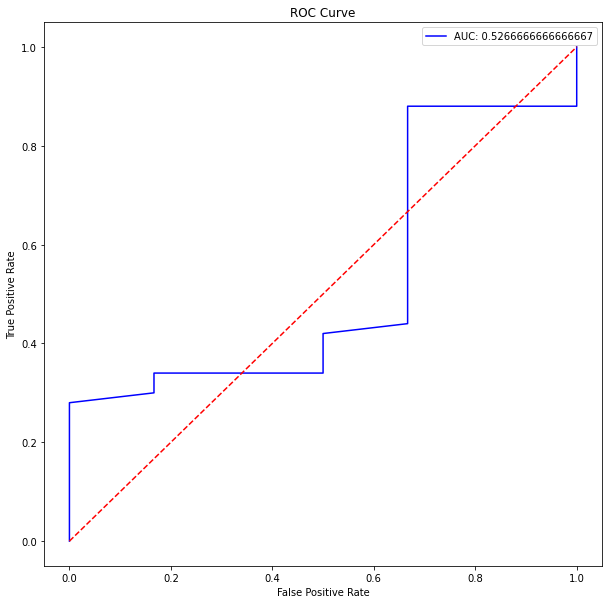

In [21]:
# plot the roc curve
from sklearn.metrics import roc_curve, roc_auc_score
# get the predictions
predictions = model.predict(test_data)
# get the fpr, tpr and threshold
fpr, tpr, threshold = roc_curve(test_data.labels, predictions)
# get the auc score
auc = roc_auc_score(test_data.labels, predictions)
# plot the roc curve
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label="AUC: " + str(auc), color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [23]:
# TEST the model with a new image
# read the image
img = cv2.imread("images.jpeg")
# resize the image
img = cv2.resize(img, (227, 227))
# normalize the image
img = img / 255.0
# add a dimension to the image
img = np.expand_dims(img, axis=0)
# make a prediction
prediction = model.predict(img)
# print the prediction
print(prediction)
if prediction[0][0] > 0.05:
    print("The image is a car")
else:
    print("The image is not a car")


1/1 [==============================] - 0s 237ms/step
[[0.05216169]]
The image is a car


In [24]:
# TEST the model with a new image
# read the image
img = cv2.imread("imagestruck.jpeg")
# resize the image
img = cv2.resize(img, (227, 227))
# normalize the image
img = img / 255.0
# add a dimension to the image
img = np.expand_dims(img, axis=0)
# make a prediction
prediction = model.predict(img)
# print the prediction
print(prediction)
if prediction[0][0] > 0.55:
    print("The image is a car")
else:
    print("The image is not a car")

1/1 [==============================] - 0s 436ms/step
[[0.2574435]]
The image is not a car
